# SUPERSTORE- EDA

In [54]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('SampleSuperstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [55]:
for i in df.columns:
    print(i,':')
    print(df[i].value_counts())
    print('\n')

Ship Mode :
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


Segment :
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


Country :
United States    9994
Name: Country, dtype: int64


City :
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64


State :
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee        

No null and missing data from the dataset(cleaned!!), => no need of feature engineering

# EDA

## Univariate Analysis

<Axes: >

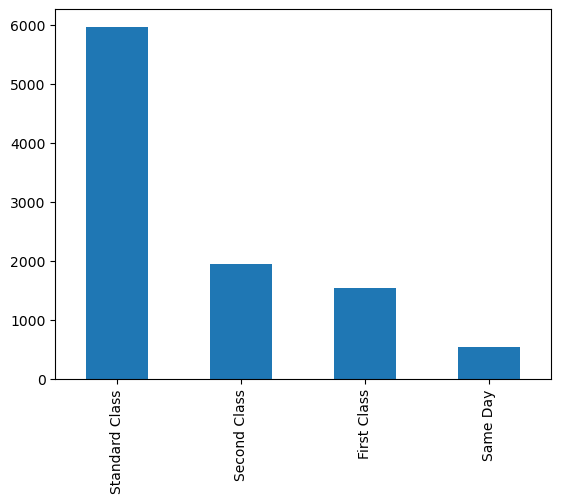

In [56]:
df['Ship Mode'].value_counts().plot(kind='bar')

<Axes: >

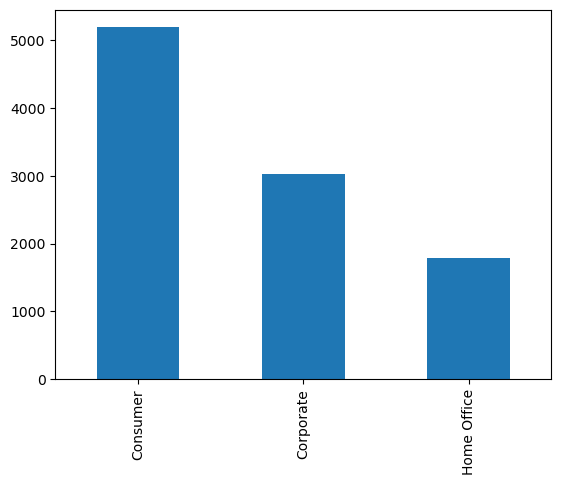

In [57]:
df['Segment'].value_counts().plot(kind='bar')

<Axes: >

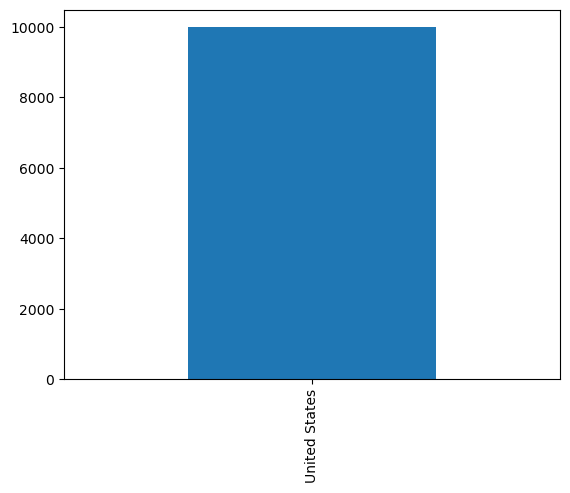

In [58]:
df['Country'].value_counts().plot(kind='bar')

<Axes: >

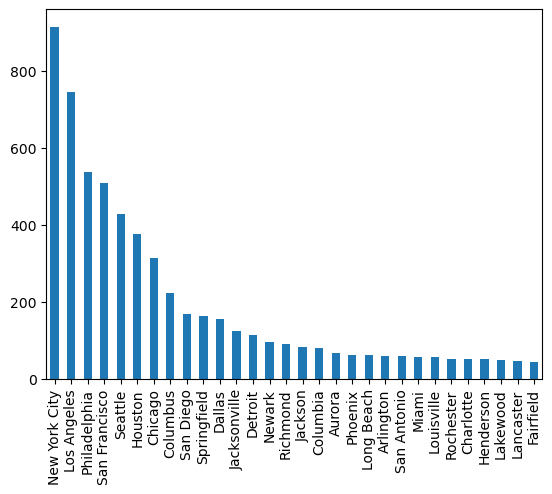

In [59]:
df['City'].value_counts()[:30].plot(kind='bar')

<Axes: >

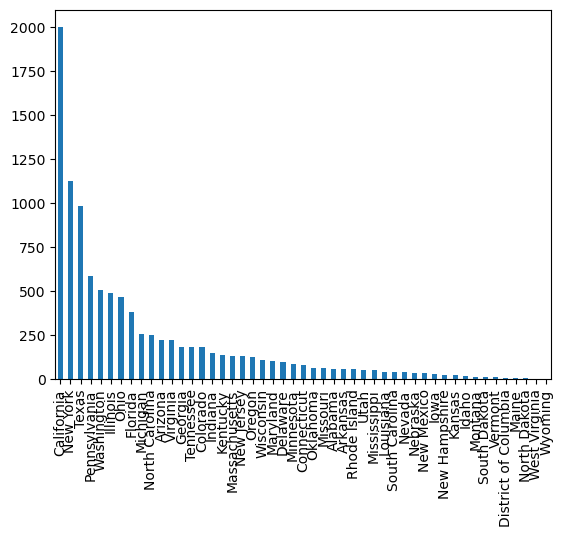

In [60]:
df['State'].value_counts().plot(kind='bar')

<Axes: >

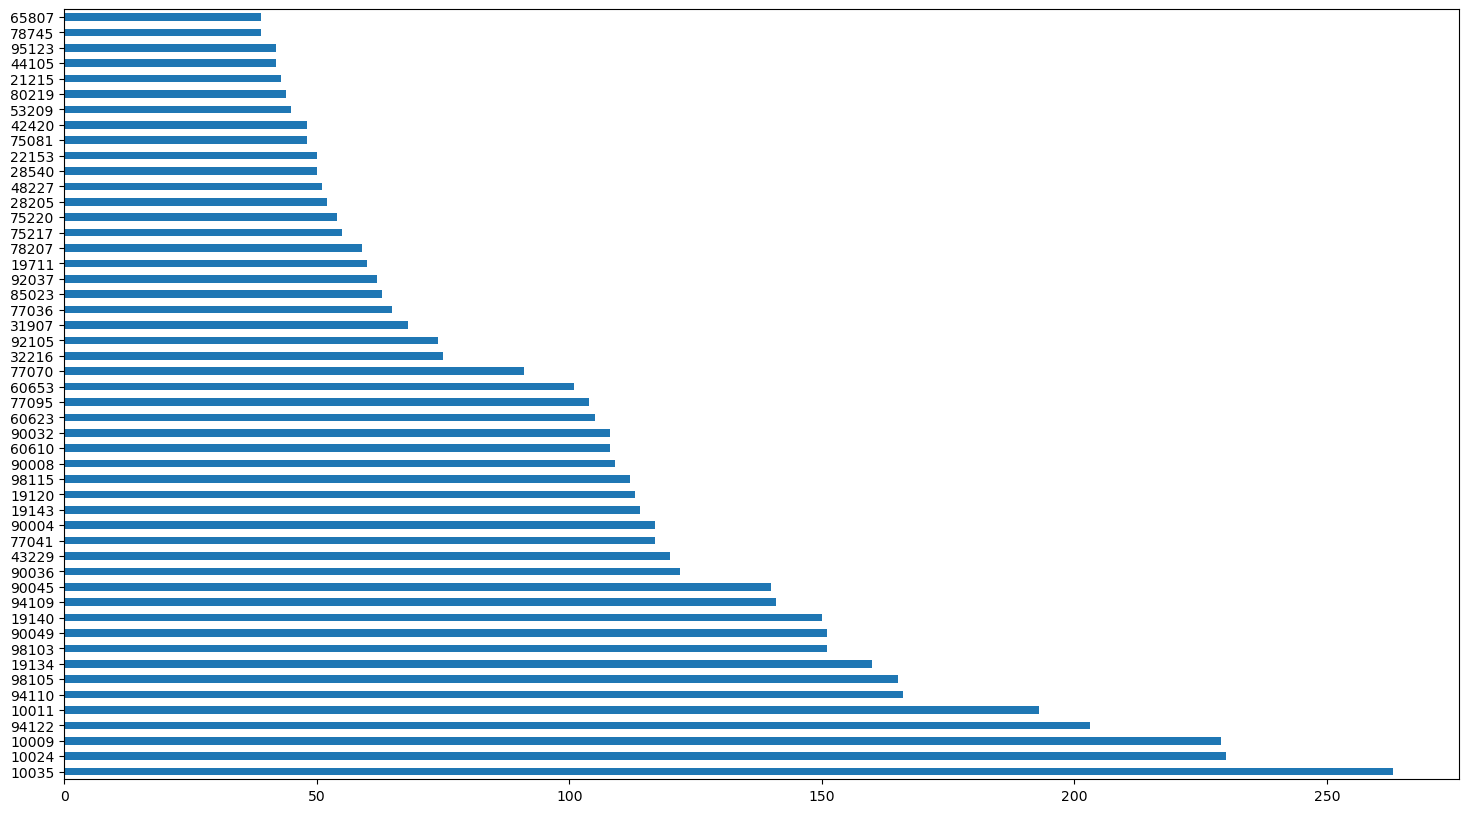

In [61]:
df['Postal Code'].value_counts()[:50].plot(kind='barh',figsize=(18,10))

<Axes: >

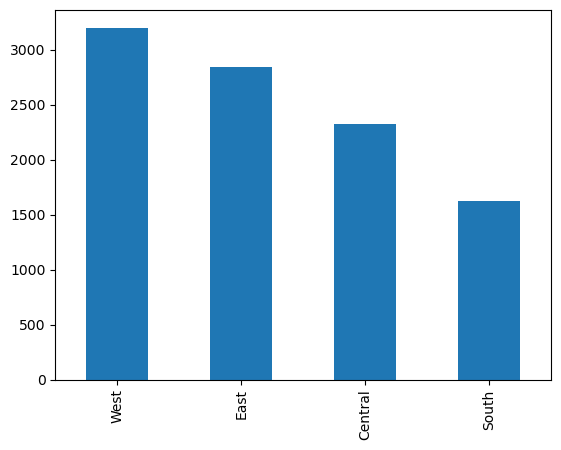

In [62]:
df['Region'].value_counts().plot(kind='bar')

<Axes: >

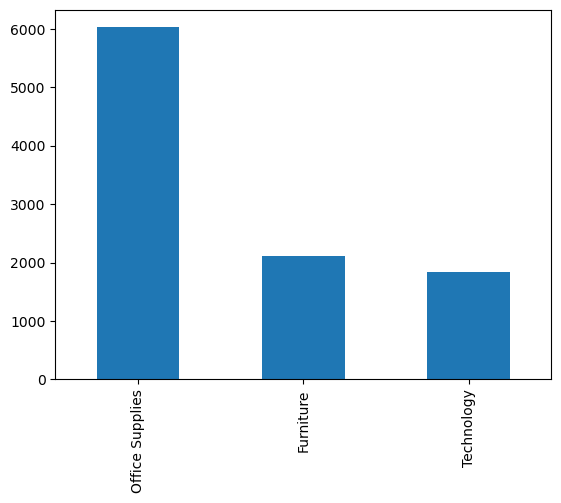

In [63]:
df['Category'].value_counts().plot(kind='bar')

<Axes: >

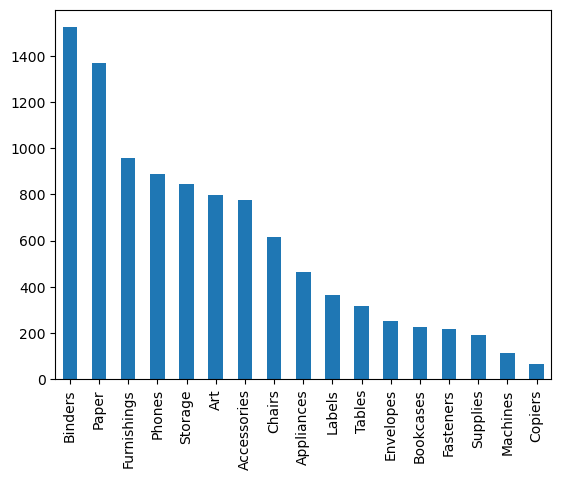

In [64]:
df['Sub-Category'].value_counts().plot(kind='bar')

The minimum sales: 0.444
The maximum sales: 22638.48
The average sales: 54.489999999999995 - 229.85800083049833


<Axes: ylabel='Density'>

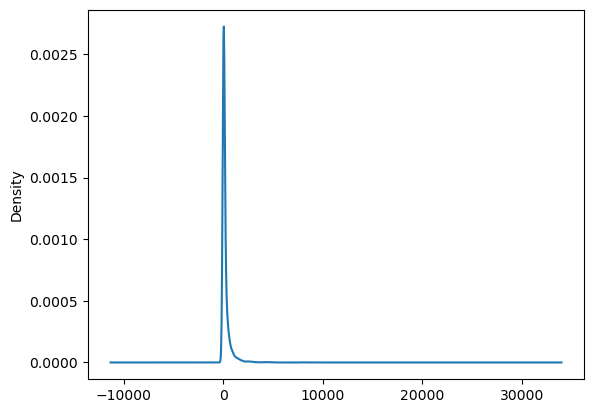

In [65]:
print('The minimum sales:',df['Sales'].min())
print('The maximum sales:',df['Sales'].max())
print('The average sales:',df['Sales'].median(),'-',df['Sales'].mean())

df['Sales'].plot(kind='kde')


<Axes: ylabel='Density'>

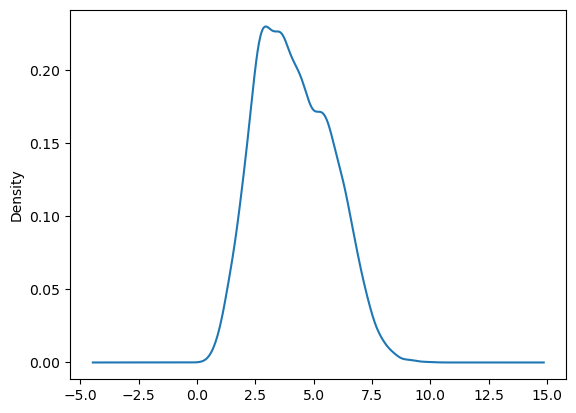

In [66]:
df['Sales']=df['Sales'].apply(lambda x: np.log(x+1))

df['Sales'].plot(kind='kde')


<Axes: >

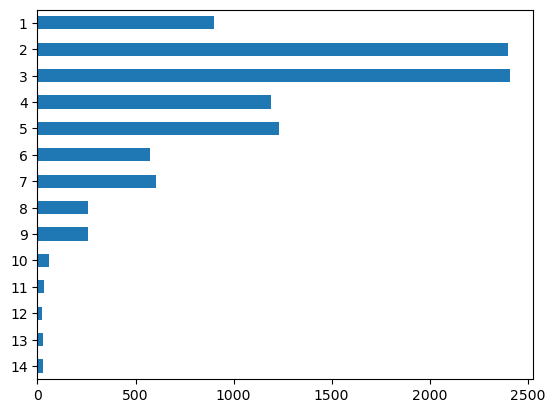

In [67]:

quality_order=df['Quantity'].value_counts().index

df['Quantity'].value_counts().loc[quality_order.sort_values(ascending=False)].plot(kind='barh')


<Axes: >

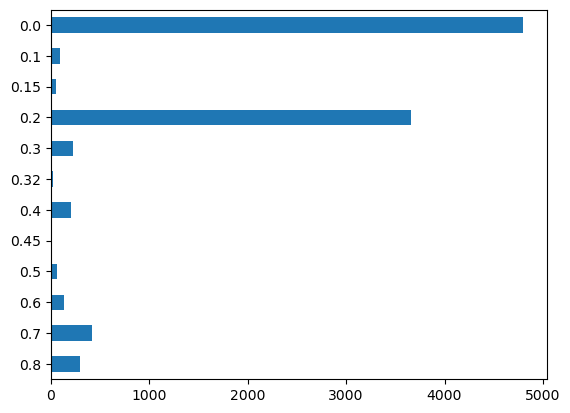

In [68]:
dis=df['Discount'].value_counts().index
df['Discount'].value_counts().loc[dis.sort_values(ascending=False)].plot(kind='barh')

0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: Profit, Length: 7287, dtype: int64

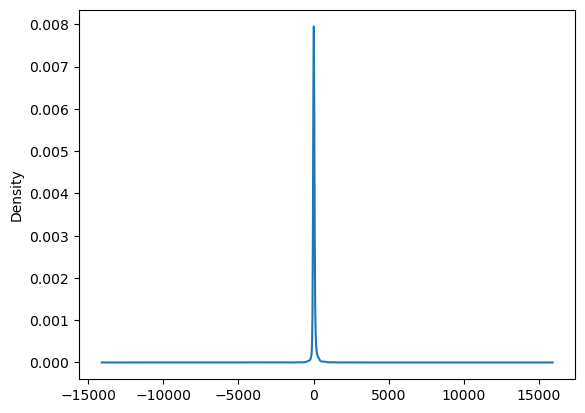

In [69]:
df['Profit'].plot(kind='kde')
df['Profit'].value_counts()

<Axes: ylabel='Density'>

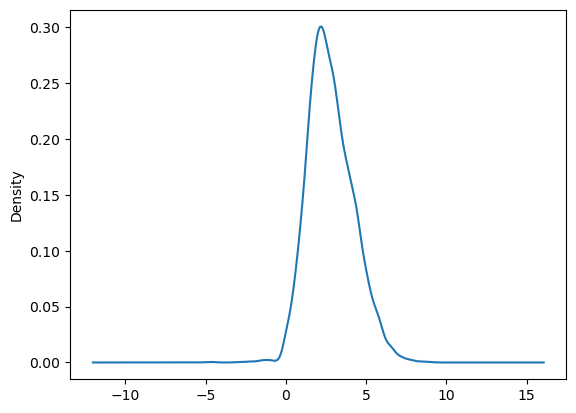

In [70]:
df['Profit']=df['Profit'].apply(lambda x: np.log(x+1))
df['Profit'].plot(kind='kde')

## Bi-variate Analysis

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        8158 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<Axes: xlabel='Profit', ylabel='Discount'>

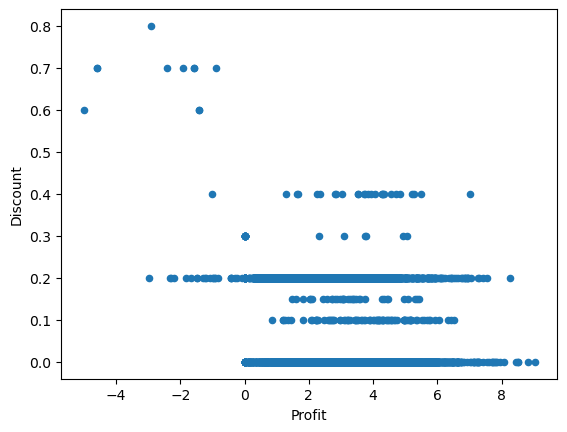

In [72]:
df.plot(kind='scatter',x='Profit',y='Discount')

Seems to be no relation between Discount and Profits!!


In [73]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.010621,0.012761,0.058443,-0.037592
Sales,-0.010621,1.000000,0.321737,-0.154262,0.857500
Quantity,0.012761,0.321737,1.000000,0.008623,0.353294
Discount,0.058443,-0.154262,0.008623,1.000000,-0.216610
Profit,-0.037592,0.857500,0.353294,-0.216610,1.000000


<Axes: xlabel='Profit', ylabel='Sales'>

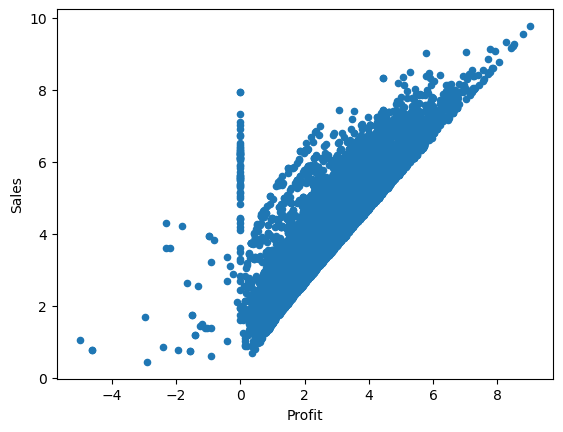

In [74]:
df.plot(kind='scatter',x='Profit',y='Sales')
# quite stronger

<Axes: xlabel='Quantity', ylabel='Sales'>

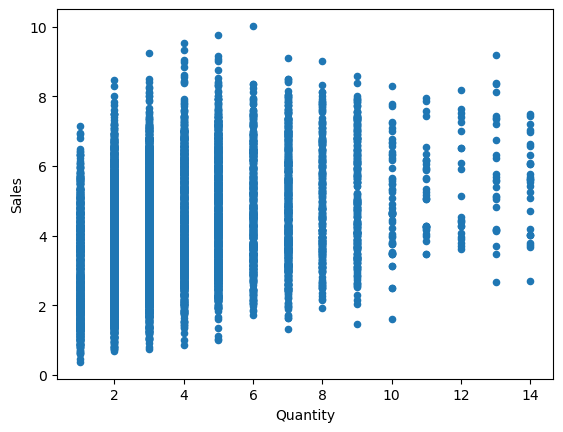

In [76]:
df.plot(kind='scatter',x='Quantity',y='Sales')

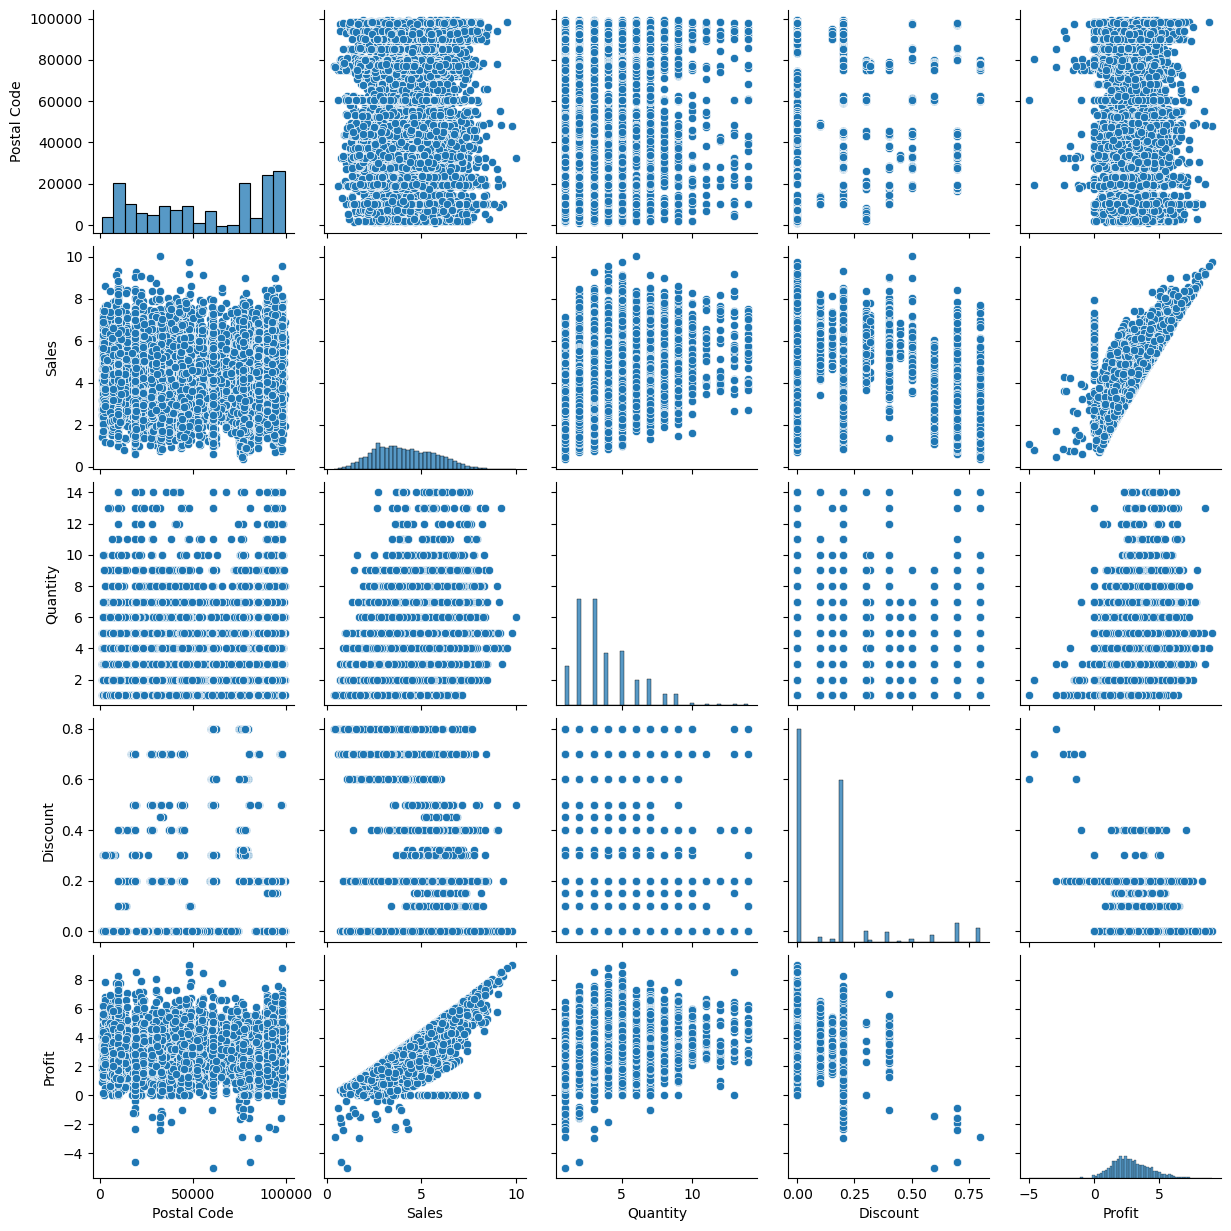

In [77]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
sns.boxplot(x='Profit',y='Segment',hue='Region',data=df)

In [ ]:
df.info()